In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib import animation
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [6]:
# loading and unpacking erp data
erp_data = np.load('erp.npz')
erp=erp_data['erp']
timepoints=erp_data['timepoints']
chan_locs_x=erp_data['chan_locs_x']
chan_locs_y=erp_data['chan_locs_y']
conditions = erp_data['conditions']

In [51]:
def create_frame(i_timepoint, erp, timepoints, chan_locs_x, chan_locs_y):
    """
    i_timepoint (int): frame of data
    erp (np.array): erp data. Has shape [timepoints, electrodes].
    timepoints (list): timepoints for trial
    chan_locs_x (list): x-coordinates for EEG electrodes
    chan_locs_y (list): y-coordinates for EEG electrodes
    """
    plt.clf()
    # create grid for interpolation
    grid_x, grid_y = np.mgrid[-1:1:1000j, -1:1:2000j]
    # grab single timepoint
    erp_timepoint = erp[:,i_timepoint]
    # interpolate data across scalp
    interp = interpolate.griddata((chan_locs_y, chan_locs_x),erp_timepoint,(grid_x,grid_y),method='cubic')

    # boring plotting stuff
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_visible(0)
    ax.yaxis.set_visible(0)

    # plotting
    interp_plot = plt.imshow(interp.T, extent=(0,1,0,1), cmap='coolwarm',vmin=-1,vmax=1)
    plt.colorbar(interp_plot,ticks = np.arange(-2,2.1,.5))
    plt.title(f'{timepoints[i_timepoint]} ms')

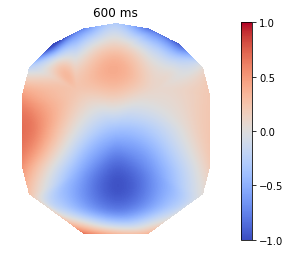

In [52]:
create_frame(i_timepoint=400, erp=erp[0], timepoints=timepoints,chan_locs_x=chan_locs_x,chan_locs_y=chan_locs_y)